In [4]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [3]:
# Load the data
filepath = '/kaggle/input/dataset-eu/DataSet_EU_3k_5k.xlsx'
df = pd.read_excel(filepath)

In [5]:
df.head()

,Power_1,Power_2,Power_3,Power_4,Power_5,Power_6,Power_7,Power_8,Power_9,Power_10,...,GSNR_69,GSNR_70,GSNR_71,GSNR_72,GSNR_73,GSNR_74,GSNR_75,GSNR_76,No. Spans,Total Distance(m)
0,0.000000,0.000000,0.000007,0.000007,0.000007,0.000000,0.000007,0.0,0.000007,0.0,...,90.061284,0.000000,0.000000,0.000000,0.000000,95.045789,0.000000,0.000000,8,690608.0
1,0.000000,0.000007,0.000000,0.000007,0.000000,0.000007,0.000000,0.0,0.000000,0.0,...,0.000000,92.560867,0.000000,0.000000,89.544975,0.000000,0.000000,0.000000,8,690608.0
2,0.000000,0.000000,0.000000,0.000007,0.000000,0.000000,0.000000,0.0,0.000007,0.0,...,0.000000,0.000000,90.991977,0.000000,0.000000,0.000000,85.512399,83.114113,8,690608.0
3,0.000007,0.000007,0.000007,0.000007,0.000007,0.000000,0.000000,0.0,0.000007,0.0,...,76.409583,73.664915,74.651700,79.071217,0.000000,0.000000,0.000000,0.000000,8,690608.0
4,0.000000,0.000000,0.000007,0.000000,0.000007,0.000000,0.000000,0.0,0.000007,0.0,...,0.000000,0.000000,78.299438,74.910765,72.030907,73.790264,81.190439,0.000000,8,690608.0


In [6]:
df.dropna(inplace=True)

In [7]:
from sklearn.preprocessing import StandardScaler
target = df['GSNR_1']
gsnr_columns = [col for col in df.columns if 'GSNR' in col]
features = df.drop(columns=gsnr_columns)
# Select numerical columns for normalization
numerical_cols = features.select_dtypes(include=[float, int]).columns
features_data = features[numerical_cols].values
scaler = StandardScaler()
scaled_feature_data = scaler.fit_transform(features_data)

In [45]:
# Convert scaled data back to DataFrame if needed
scaled_features_df = pd.DataFrame(scaled_feature_data, columns=numerical_cols)

# Display scaled features and target
print("Scaled Features:\n", scaled_features_df.head())
print("Target:\n",target.head())

# Select all non-numeric columns
non_numeric_cols = features.select_dtypes(exclude=[float, int]).columns
non_numeric_data = df[non_numeric_cols].values
non_numeric_features_df = pd.DataFrame(non_numeric_data, columns=non_numeric_cols)
print(non_numeric_features_df.head())

Scaled Features:
     Power_1   Power_2   Power_3   Power_4   Power_5   Power_6   Power_7  \
0 -0.627072 -0.619540 -0.422741 -0.417544 -0.422079 -0.623852 -0.434153   
1 -0.627072 -0.428600 -0.618699 -0.422270 -0.618282 -0.432992 -0.629027   
2 -0.627072 -0.619540 -0.618699 -0.420646 -0.618282 -0.623852 -0.629027   
3 -0.435928 -0.427249 -0.426130 -0.420755 -0.425414 -0.623852 -0.629027   
4 -0.627072 -0.619540 -0.431650 -0.614222 -0.430993 -0.623852 -0.629027   

    Power_8   Power_9  Power_10  ...  frequency_69  frequency_70  \
0 -0.619551 -0.420660 -0.609301  ...           0.0           0.0   
1 -0.619551 -0.617312 -0.609301  ...           0.0           0.0   
2 -0.619551 -0.423774 -0.609301  ...           0.0           0.0   
3 -0.619551 -0.423705 -0.609301  ...           0.0           0.0   
4 -0.619551 -0.429681 -0.609301  ...           0.0           0.0   

   frequency_71  frequency_72  frequency_73  frequency_74  frequency_75  \
0           0.0           0.0           0.0    

In [8]:
#As there are no non numeric columns, we will simply be assuming scaled_features_df as features data frame.
features = scaled_features_df

NameError: name 'scaled_features_df' is not defined

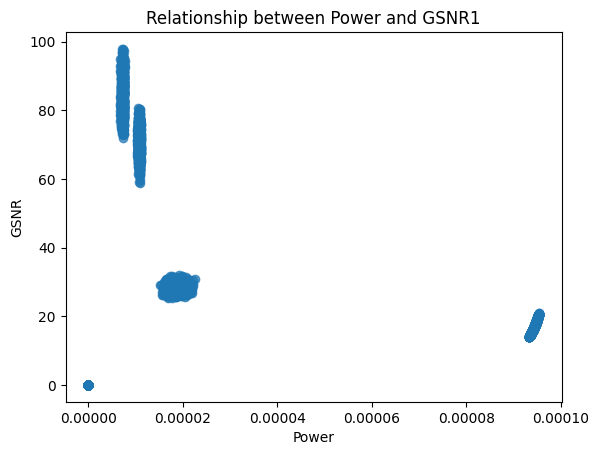

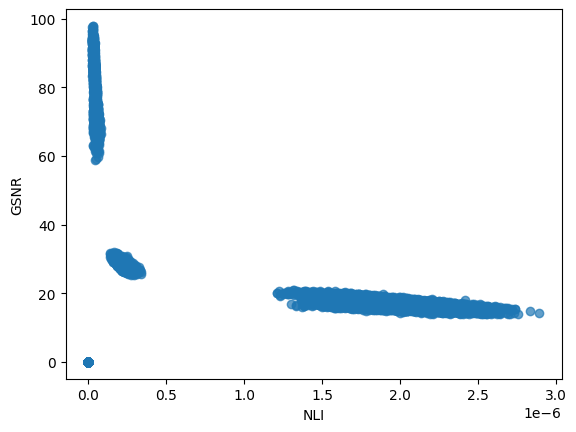

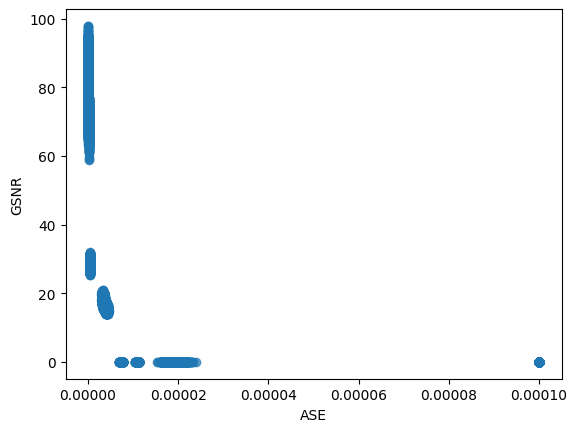

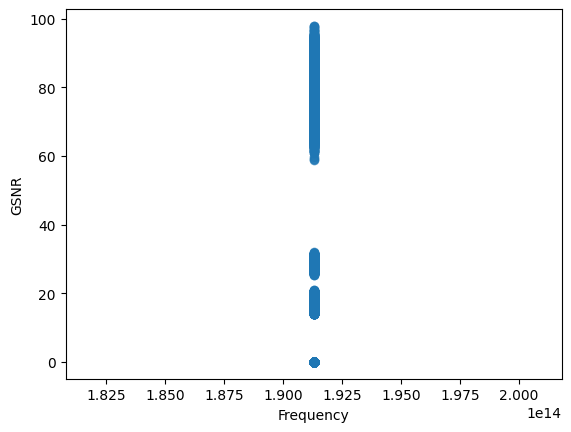

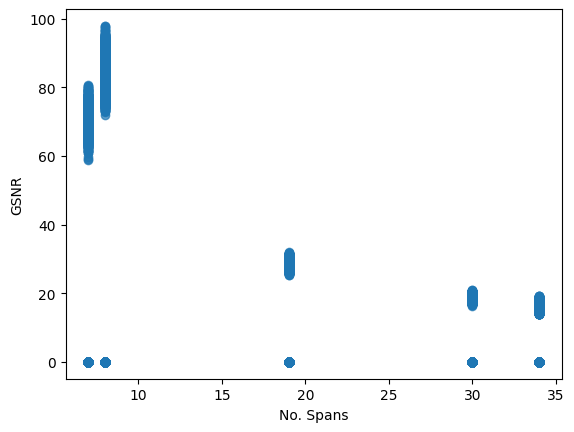

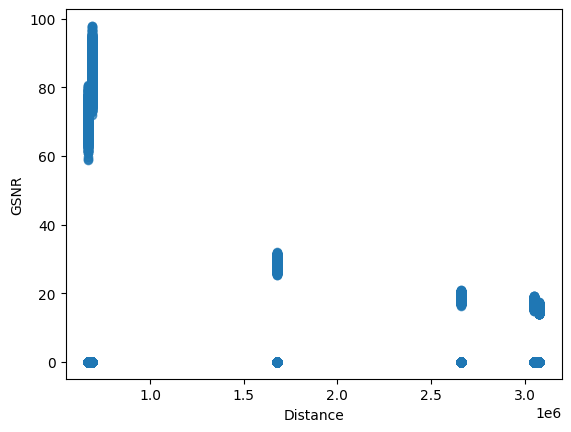

In [47]:

import matplotlib.pyplot as plt
plt.scatter(df['Power_1'], df['GSNR_1'], alpha=0.7)
plt.title('Relationship between Power and GSNR1')
plt.xlabel('Power')
plt.ylabel('GSNR')
plt.show()

plt.scatter(df['NLI_1'], df['GSNR_1'], alpha=0.7)
plt.xlabel('NLI')
plt.ylabel('GSNR')
plt.show()

plt.scatter(df['ASE_1'], df['GSNR_1'], alpha=0.7)
plt.xlabel('ASE')
plt.ylabel('GSNR')
plt.show()

plt.scatter(df['frequency_1'], df['GSNR_1'], alpha=0.7)
plt.xlabel('Frequency')
plt.ylabel('GSNR')
plt.show()

plt.scatter(df['No. Spans'], df['GSNR_1'], alpha=0.7)
plt.xlabel('No. Spans')
plt.ylabel('GSNR')
plt.show()

plt.scatter(df['Total Distance(m)'], df['GSNR_1'], alpha=0.7)
plt.xlabel('Distance')
plt.ylabel('GSNR')
plt.show()



In [ ]:
features_columns = [col for col in df.columns if 'frequency' in col]
features = features.drop(columns=features_columns)

In [49]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Columns: 230 entries, Power_1 to Total Distance(m)
dtypes: float64(230)
memory usage: 31.6 MB


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.9, random_state=42)
# Split the training data into an initial subset and a pool of unlabeled data
#X_initial, X_pool, y_initial, y_pool = train_test_split(X_train_meta, y_train_meta, test_size=0.9, random_state=42)



In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

lr = LinearRegression()
lr.fit(X_train, y_train)
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)
models = {'Linear Regression': lr, 'Decision Tree': dt, 'Random Forest': rf, 'Gradient Boosting': gb}

for name, model in models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print(f'{name} - MSE: {mse:.2f},Mean Absolute Error: {mae:.2f}, R^2: {r2:.2f}')


Linear Regression - MSE: 451.71,Mean Absolute Error: 16.92, R^2: 0.38
Decision Tree - MSE: 1.17,Mean Absolute Error: 0.38, R^2: 1.00
Random Forest - MSE: 0.61,Mean Absolute Error: 0.27, R^2: 1.00
Gradient Boosting - MSE: 0.36,Mean Absolute Error: 0.25, R^2: 1.00


This shows that the gradient boosting and random forest algorithm are performing best among all the algorithms.

In [52]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_absolute_error
import numpy as np

# Assume X_train, X_test, y_train, y_test are defined

# Initialize base models
final_models = [
    ('rf', RandomForestRegressor()),
    ('gb', GradientBoostingRegressor())
]



# Perform Grid Search and update meta-features
for i, (name, model) in enumerate(final_models):
    print(f"Performing Grid Search for {name}...")
    
    if name == 'rf':
        param_grid = {
            'n_estimators': [50, 100],
            'max_depth': [10, 20]
        }
    elif name == 'gb':
        param_grid = {
            'n_estimators': [100, 200],
            'learning_rate': [0.01, 0.1],
            'max_depth': [3, 5]
        }
    
    # Grid Search
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_absolute_error')
    grid_search.fit(X_train, y_train)  # Fit on original training data
    
    best_model = grid_search.best_estimator_
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    
    


Performing Grid Search for rf...
Best parameters for rf: {'max_depth': 10, 'n_estimators': 100}
Performing Grid Search for gb...
Best parameters for gb: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}


In [53]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_absolute_error
import numpy as np

# Assume X_train, X_test, y_train, y_test are defined

# Initialize base models
final_models = [
    ('rf', RandomForestRegressor()),
    ('gb', GradientBoostingRegressor())
]
train_meta_features = np.zeros((X_train.shape[0], len(final_models)))
test_meta_features = np.zeros((X_test.shape[0], len(final_models)))
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# Random Forest
best_rf_model = RandomForestRegressor(max_depth=20, n_estimators=100, random_state=42)
best_rf_model.fit(X_train, y_train)
train_meta_features[:, 0] = best_rf_model.predict(X_train)
test_meta_features[:, 0] = best_rf_model.predict(X_test)
print("done")
# Gradient Boosting
best_gb_model = GradientBoostingRegressor(learning_rate=0.01, max_depth=5, n_estimators=200, random_state=42)
best_gb_model.fit(X_train, y_train)
train_meta_features[:, 1] = best_gb_model.predict(X_train)
test_meta_features[:, 1] = best_gb_model.predict(X_test)
print("done")

done
done


In [54]:
import torch
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler

# Convert pandas Series to numpy arrays
y_train_numpy = y_train.to_numpy()
y_test_numpy = y_test.to_numpy()

# Convert numpy arrays to PyTorch tensors
X_train_meta = torch.tensor(train_meta_features, dtype=torch.float32)
y_train_meta = torch.tensor(y_train_numpy, dtype=torch.float32).view(-1, 1)  # Convert to column vector
X_test_meta = torch.tensor(test_meta_features, dtype=torch.float32)
y_test_meta = torch.tensor(y_test_numpy, dtype=torch.float32).view(-1, 1)  # Convert to column vector

# Normalize data using MinMaxScaler
scaler = MinMaxScaler()
X_train_meta = scaler.fit_transform(X_train_meta)
X_test_meta = scaler.transform(X_test_meta)

# Convert numpy arrays back to PyTorch tensors after scaling
X_train_meta = torch.tensor(X_train_meta, dtype=torch.float32)
X_test_meta = torch.tensor(X_test_meta, dtype=torch.float32)

# Create a validation set from the original training data
X_train_meta, X_val_meta, y_train_meta, y_val_meta = train_test_split(X_train_meta, y_train_meta, test_size=0.1, random_state=42)

# Convert to PyTorch tensors if not already
X_val_meta = torch.tensor(X_val_meta, dtype=torch.float32)
y_val_meta = torch.tensor(y_val_meta, dtype=torch.float32).view(-1, 1)


# Create DataLoader
train_dataset = TensorDataset(X_train_meta, y_train_meta)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

class ANNModel(nn.Module):
    def __init__(self, input_dim):
        super(ANNModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 1)
        self.dropout = nn.Dropout(p=0.5)  # Add dropout layer

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)  # Apply dropout
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)  # Apply dropout
        x = torch.relu(self.fc3(x))
        x = self.dropout(x)  # Apply dropout
        x = self.fc4(x)
        return x

# Initialize the model
input_dim = train_meta_features.shape[1]  # Number of meta-features
model = ANNModel(input_dim)

# Define loss function and optimizer with L2 regularization
criterion = nn.MSELoss()  # Mean Squared Error Loss for regression
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.01)  # L2 regularization with weight_decay


# Active Learning Parameters
num_iterations = 10  # Number of active learning iterations
samples_per_iteration = 10  # Number of samples to add per iteration

for iteration in range(num_iterations):
    # Train the model on the current training data
    for epoch in range(num_epochs):
        model.train()
        avg_loss = 0
        for inputs, targets in initial_train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            avg_loss += loss.item()
        
        avg_loss /= len(initial_train_loader)
        print(f"Iteration [{iteration+1}/{num_iterations}], Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")

    # Use the model to predict on the unlabeled pool
    model.eval()
    with torch.no_grad():
        pool_outputs = model(X_test)
    
    # Calculate uncertainty (e.g., absolute difference from mean prediction)
    uncertainty = torch.abs(pool_outputs - pool_outputs.mean())
    
    # Select the most uncertain samples
    _, most_uncertain_indices = torch.topk(uncertainty, samples_per_iteration)
    
    # Extract the selected samples and their labels
    X_selected = X_test[most_uncertain_indices]
    y_selected = y_test[most_uncertain_indices]
    
    # Remove the selected samples from the pool
    X_test = torch.cat((X_test[:most_uncertain_indices[0]], X_test[most_uncertain_indices[-1] + 1:]))
    y_test = torch.cat((y_test[:most_uncertain_indices[0]], y_test[most_uncertain_indices[-1] + 1:]))
    
    # Add the selected samples to the training set
    X_train = torch.cat((X_train, X_selected))
    y_train = torch.cat((y_train, y_selected))
    
    # Update the DataLoader with the new training set
    initial_train_dataset = TensorDataset(X_train, y_initial)
    initial_train_loader = DataLoader(initial_train_dataset, batch_size=16, shuffle=True)

    # Optionally, evaluate the model's performance on the validation set
    # (Assuming X_val_meta and y_val_meta are your validation data)
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val_meta)
    val_loss = criterion(val_outputs, y_val_meta).item()
    print(f"Iteration [{iteration+1}/{num_iterations}], Validation Loss: {val_loss:.4f}")





/tmp/ipykernel_33/2885796190.py:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_val_meta = torch.tensor(X_val_meta, dtype=torch.float32)
/tmp/ipykernel_33/2885796190.py:31: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_val_meta = torch.tensor(y_val_meta, dtype=torch.float32).view(-1, 1)


NameError: name 'initial_train_loader' is not defined

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import torch
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Split data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.9, random_state=42)

# Convert pandas Series to numpy arrays
y_train_numpy = y_train.to_numpy()
y_test_numpy = y_test.to_numpy()

# Convert numpy arrays to PyTorch tensors
X_train_meta = torch.tensor(X_train.to_numpy(), dtype=torch.float32)
y_train_meta = torch.tensor(y_train_numpy, dtype=torch.float32).view(-1, 1)  # Convert to column vector
X_test_meta = torch.tensor(X_test.to_numpy(), dtype=torch.float32)
y_test_meta = torch.tensor(y_test_numpy, dtype=torch.float32).view(-1, 1)  # Convert to column vector

# Normalize data using MinMaxScaler
scaler = MinMaxScaler()
X_train_meta = scaler.fit_transform(X_train_meta)
X_test_meta = scaler.transform(X_test_meta)

# Convert numpy arrays back to PyTorch tensors after scaling
X_train_meta = torch.tensor(X_train_meta, dtype=torch.float32)
X_test_meta = torch.tensor(X_test_meta, dtype=torch.float32)

# Create a validation set from the original training data
X_train_meta, X_val_meta, y_train_meta, y_val_meta = train_test_split(X_train_meta, y_train_meta, test_size=0.1, random_state=42)

# Create DataLoader
train_dataset = TensorDataset(X_train_meta, y_train_meta)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

# Define the ANN model
class ANNModel(nn.Module):
    def __init__(self, input_dim):
        super(ANNModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 1)
        self.dropout = nn.Dropout(p=0.5)  # Add dropout layer

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)  # Apply dropout
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)  # Apply dropout
        x = torch.relu(self.fc3(x))
        x = self.dropout(x)  # Apply dropout
        x = self.fc4(x)
        return x

# Initialize the model
input_dim = X_train_meta.shape[1]  # Number of meta-features
model = ANNModel(input_dim)

# Define loss function and optimizer with L2 regularization
criterion = nn.MSELoss()  # Mean Squared Error Loss for regression
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.01)  # L2 regularization with weight_decay

# Active Learning Parameters
num_iterations = 4  # Number of active learning iterations
samples_per_iteration = 15  # Number of samples to add per iteration
num_epochs = 30
for iteration in range(num_iterations):
    # Train the model on the current training data
    for epoch in range(num_epochs):
        model.train()
        avg_loss = 0
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            avg_loss += loss.item()
        
        avg_loss /= len(train_loader)
        print(f"Iteration [{iteration+1}/{num_iterations}], Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")

    # Use the model to predict on the unlabeled pool
    model.eval()
    with torch.no_grad():
        pool_outputs = model(X_test_meta)
    
    # Calculate uncertainty (e.g., absolute difference from mean prediction)
    uncertainty = torch.abs(pool_outputs - pool_outputs.mean())
    
    # Ensure samples_per_iteration is valid
    samples_per_iteration = min(samples_per_iteration, X_test_meta.size(0), uncertainty.size(0))
    # Determine the minimum size based on the first dimension of both tensors
    samples_per_iteration = min(samples_per_iteration, X_test_meta.size(0), uncertainty.size(0))
    
    # Determine the minimum size based on the first dimension of both tensors
    samples_per_iteration = min(samples_per_iteration, X_test_meta.size(1), uncertainty.size(1))

    if samples_per_iteration > 0:  # Ensure there are samples to select
        # Select the most uncertain samples
        _, most_uncertain_indices = torch.topk(uncertainty, samples_per_iteration)

        # Extract the selected samples and their labels
        X_selected = X_test_meta[most_uncertain_indices]
        y_selected = y_test_meta[most_uncertain_indices].view(-1, 1)  # Ensure it's a column vector

        # Remove the selected samples from the pool
        mask = torch.ones(X_test_meta.size(0), dtype=torch.bool)
        mask[most_uncertain_indices] = False
        X_test_meta = X_test_meta[mask]
        y_test_meta = y_test_meta[mask]
        # Remove the extra dimension from X_selected
        X_selected = X_selected.squeeze(1)  # Removes the dimension of size 1 at position 1

        # Ensure y_selected is also reshaped correctly
        y_selected = y_selected.view(-1, 1)  # Ensure it's a column vector
        print(X_train_meta.shape)
        print(X_selected.shape)
        # Add the selected samples to the training set
        X_train_meta = torch.cat((X_train_meta, X_selected))
        y_train_meta = torch.cat((y_train_meta, y_selected))

        # Update the DataLoader with the new training set
        train_dataset = TensorDataset(X_train_meta, y_train_meta)
        train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

    # Optionally, evaluate the model's performance on the validation set
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val_meta)
    val_loss = criterion(val_outputs, y_val_meta).item()
    print(f"Iteration [{iteration+1}/{num_iterations}], Validation Loss: {val_loss:.4f}")

# Final evaluation on test set
model.eval()
with torch.no_grad():
    y_pred = model(X_test_meta).squeeze()
    
    # Convert tensors to numpy arrays for use with scikit-learn
    y_pred_np = y_pred.numpy()
    y_test_meta_np = y_test_meta.numpy()
    
    # Calculate metrics
    mae = mean_absolute_error(y_test_meta_np, y_pred_np)
    mse = mean_squared_error(y_test_meta_np, y_pred_np)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_meta_np, y_pred_np)
    
    # Print metrics
    print(f"Test MAE: {mae:.4f}")
    print(f"Test MSE: {mse:.4f}")
    print(f"Test RMSE: {rmse:.4f}")
    print(f"Test R^2: {r2:.4f}")


In [ ]:
import torch
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Ensure the model is in evaluation mode
model.eval()
with torch.no_grad():
    # Make predictions
    y_pred = model(X_test_meta).squeeze()
    
    # Convert tensors to numpy arrays for use with scikit-learn
    y_pred_np = y_pred.numpy()
    y_test_meta_np = y_test_meta.numpy()
    
    # Calculate metrics
    mae = mean_absolute_error(y_test_meta_np, y_pred_np)
    mse = mean_squared_error(y_test_meta_np, y_pred_np)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_meta_np, y_pred_np)
    
    # Print metrics
    print(f"Final Mean Absolute Error for ANN: {mae:.4f}")
    print(f"Final Mean Squared Error for ANN: {mse:.4f}")
    print(f"Final Root Mean Squared Error for ANN: {rmse:.4f}")
    print(f"Final R-squared for ANN: {r2:.4f}")


In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import StackingRegressor
import numpy as np

# Convert pandas Series to numpy arrays
y_train_numpy = y_train.to_numpy()
y_test_numpy = y_test.to_numpy()

# Convert numpy arrays to PyTorch tensors
X_train_meta = torch.tensor(train_meta_features, dtype=torch.float32)
y_train_meta = torch.tensor(y_train_numpy, dtype=torch.float32).view(-1, 1)  # Convert to column vector
X_test_meta = torch.tensor(test_meta_features, dtype=torch.float32)
y_test_meta = torch.tensor(y_test_numpy, dtype=torch.float32).view(-1, 1)  # Convert to column vector

# Normalize data using MinMaxScaler
scaler = MinMaxScaler()
X_train_meta = scaler.fit_transform(X_train_meta)
X_test_meta = scaler.transform(X_test_meta)

# Convert numpy arrays back to PyTorch tensors after scaling
X_train_meta = torch.tensor(X_train_meta, dtype=torch.float32)
X_test_meta = torch.tensor(X_test_meta, dtype=torch.float32)

# Create a validation set from the original training data
X_train_meta, X_val_meta, y_train_meta, y_val_meta = train_test_split(X_train_meta, y_train_meta, test_size=0.1, random_state=42)

# Convert to PyTorch tensors if not already
X_val_meta = torch.tensor(X_val_meta, dtype=torch.float32)
y_val_meta = torch.tensor(y_val_meta, dtype=torch.float32).view(-1, 1) 

# Convert PyTorch tensors to numpy arrays for scikit-learn
X_train_meta_np = X_train_meta.numpy()
X_val_meta_np = X_val_meta.numpy()
X_test_meta_np = X_test_meta.numpy()
y_train_meta_np = y_train_meta.numpy().ravel()
y_val_meta_np = y_val_meta.numpy().ravel()
y_test_meta_np = y_test_meta.numpy().ravel()

# Define base learners
base_learners = [
    ('ridge', Ridge()),
    ('rf', RandomForestRegressor()),
    ('gbr', GradientBoostingRegressor())
]

# Define meta-learner
meta_learner = Ridge()

# Define stacking model
stacking_model = StackingRegressor(estimators=base_learners, final_estimator=meta_learner)

# Active Learning Parameters
num_iterations = 20  # Number of active learning iterations
samples_per_iteration = 7  # Number of samples to add per iteration

for iteration in range(num_iterations):
    # Train the stacking model on the current training data
    stacking_model.fit(X_train_meta_np, y_train_meta_np)

    # Use the model to predict on the unlabeled pool
    pool_outputs = stacking_model.predict(X_test_meta_np)
    
    # Calculate uncertainty (e.g., absolute difference from mean prediction)
    pool_outputs_mean = np.mean(pool_outputs)
    uncertainty = np.abs(pool_outputs - pool_outputs_mean)
    
    # Adjust the samples_per_iteration if it exceeds the available samples in X_test_meta
    samples_per_iteration = min(samples_per_iteration, X_test_meta_np.shape[0])
    
    # Select the most uncertain samples
    most_uncertain_indices = np.argsort(uncertainty)[-samples_per_iteration:]
    
    # Extract the selected samples and their labels
    X_selected = X_test_meta_np[most_uncertain_indices]
    y_selected = y_test_meta_np[most_uncertain_indices]
    
    # Remove the selected samples from the pool
    mask = np.ones(len(X_test_meta_np), dtype=bool)
    mask[most_uncertain_indices] = False
    X_test_meta_np = X_test_meta_np[mask]
    y_test_meta_np = y_test_meta_np[mask]
    
    # Add the selected samples to the training set
    X_train_meta_np = np.vstack((X_train_meta_np, X_selected))
    y_train_meta_np = np.concatenate((y_train_meta_np, y_selected))
    
    # Optionally, evaluate the model's performance on the validation set
    val_outputs = stacking_model.predict(X_val_meta_np)
    val_mae = mean_absolute_error(y_val_meta_np, val_outputs)
    val_mse = mean_squared_error(y_val_meta_np, val_outputs)
    val_rmse = np.sqrt(val_mse)
    val_r2 = r2_score(y_val_meta_np, val_outputs)
    
    print(f"Iteration [{iteration+1}/{num_iterations}], Validation MAE: {val_mae:.4f}, Validation MSE: {val_mse:.4f}, Validation RMSE: {val_rmse:.4f}, Validation R^2: {val_r2:.4f}")

# Final evaluation on the test set
test_outputs = stacking_model.predict(X_test_meta_np)
test_mae = mean_absolute_error(y_test_meta_np, test_outputs)
test_mse = mean_squared_error(y_test_meta_np, test_outputs)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test_meta_np, test_outputs)

print(f"Test MAE: {test_mae:.4f}")
print(f"Test MSE: {test_mse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")
print(f"Test R^2: {test_r2:.4f}")


In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, StackingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Convert pandas Series to numpy arrays
y_train_numpy = y_train.to_numpy()
y_test_numpy = y_test.to_numpy()

# Convert numpy arrays to PyTorch tensors
X_train_meta = torch.tensor(train_meta_features, dtype=torch.float32)
y_train_meta = torch.tensor(y_train_numpy, dtype=torch.float32).view(-1, 1)  # Convert to column vector
X_test_meta = torch.tensor(test_meta_features, dtype=torch.float32)
y_test_meta = torch.tensor(y_test_numpy, dtype=torch.float32).view(-1, 1)  # Convert to column vector

# Normalize data using MinMaxScaler
scaler = MinMaxScaler()
X_train_meta = scaler.fit_transform(X_train_meta)
X_test_meta = scaler.transform(X_test_meta)

# Convert numpy arrays back to PyTorch tensors after scaling
X_train_meta = torch.tensor(X_train_meta, dtype=torch.float32)
X_test_meta = torch.tensor(X_test_meta, dtype=torch.float32)

# Create a validation set from the original training data
X_train_meta, X_val_meta, y_train_meta, y_val_meta = train_test_split(X_train_meta, y_train_meta, test_size=0.1, random_state=42)

# Convert to numpy arrays for scikit-learn
X_train_meta_np = X_train_meta.numpy()
X_val_meta_np = X_val_meta.numpy()
X_test_meta_np = X_test_meta.numpy()
y_train_meta_np = y_train_meta.numpy().ravel()
y_val_meta_np = y_val_meta.numpy().ravel()
y_test_meta_np = y_test_meta.numpy().ravel()

# Define base learners
base_learners = [
    ('ridge', Ridge()),
    ('rf', RandomForestRegressor()),
    ('gbr', GradientBoostingRegressor())
]

# Define meta-learner
meta_learner = Ridge()

# Define stacking model
stacking_model = StackingRegressor(estimators=base_learners, final_estimator=meta_learner)

# Train the stacking model on the full training data
stacking_model.fit(X_train_meta_np, y_train_meta_np)

# Evaluate the model's performance on the validation set
val_outputs = stacking_model.predict(X_val_meta_np)
val_mae = mean_absolute_error(y_val_meta_np, val_outputs)
val_mse = mean_squared_error(y_val_meta_np, val_outputs)
val_rmse = np.sqrt(val_mse)
val_r2 = r2_score(y_val_meta_np, val_outputs)

print(f"Validation MAE: {val_mae:.4f}")
print(f"Validation MSE: {val_mse:.4f}")
print(f"Validation RMSE: {val_rmse:.4f}")
print(f"Validation R^2: {val_r2:.4f}")

# Final evaluation on the test set
test_outputs = stacking_model.predict(X_test_meta_np)
test_mae = mean_absolute_error(y_test_meta_np, test_outputs)
test_mse = mean_squared_error(y_test_meta_np, test_outputs)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test_meta_np, test_outputs)

print(f"Test MAE: {test_mae:.4f}")
print(f"Test MSE: {test_mse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")
print(f"Test R^2: {test_r2:.4f}")


In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, StackingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import numpy as np

# Convert pandas Series to numpy arrays
y_train_numpy = y_train.to_numpy()
y_test_numpy = y_test.to_numpy()

# Convert numpy arrays to PyTorch tensors
X_train_meta = torch.tensor(train_meta_features, dtype=torch.float32)
y_train_meta = torch.tensor(y_train_numpy, dtype=torch.float32).view(-1, 1)  # Convert to column vector
X_test_meta = torch.tensor(test_meta_features, dtype=torch.float32)
y_test_meta = torch.tensor(y_test_numpy, dtype=torch.float32).view(-1, 1)  # Convert to column vector

# Normalize data using MinMaxScaler
scaler = MinMaxScaler()
X_train_meta = scaler.fit_transform(X_train_meta)
X_test_meta = scaler.transform(X_test_meta)

# Convert numpy arrays back to PyTorch tensors after scaling
X_train_meta = torch.tensor(X_train_meta, dtype=torch.float32)
X_test_meta = torch.tensor(X_test_meta, dtype=torch.float32)

# Create a validation set from the original training data
X_train_meta, X_val_meta, y_train_meta, y_val_meta = train_test_split(X_train_meta, y_train_meta, test_size=0.1, random_state=42)

# Convert to PyTorch tensors if not already
X_val_meta = torch.tensor(X_val_meta, dtype=torch.float32)
y_val_meta = torch.tensor(y_val_meta, dtype=torch.float32).view(-1, 1) 

# Convert PyTorch tensors to numpy arrays for scikit-learn
X_train_meta_np = X_train_meta.numpy()
X_val_meta_np = X_val_meta.numpy()
X_test_meta_np = X_test_meta.numpy()
y_train_meta_np = y_train_meta.numpy().ravel()
y_val_meta_np = y_val_meta.numpy().ravel()
y_test_meta_np = y_test_meta.numpy().ravel()

# Define base learners with hyperparameter tuning
base_learners = [
    ('ridge', Ridge(alpha=1.0)),  # Regularization parameter
    ('rf', RandomForestRegressor(n_estimators=100, max_depth=10)),  # Limit complexity
    ('gbr', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1))  # Learning rate adjustment
]

# Define meta-learner with regularization
meta_learner = Ridge(alpha=1.0)

# Define stacking model
stacking_model = StackingRegressor(estimators=base_learners, final_estimator=meta_learner)

# Active Learning Parameters
num_iterations = 20  # Number of active learning iterations
samples_per_iteration = 7  # Number of samples to add per iteration

for iteration in range(num_iterations):
    # Train the stacking model on the current training data
    stacking_model.fit(X_train_meta_np, y_train_meta_np)

    # Use the model to predict on the unlabeled pool
    pool_outputs = stacking_model.predict(X_test_meta_np)
    
    # Calculate uncertainty (e.g., absolute difference from mean prediction)
    pool_outputs_mean = np.mean(pool_outputs)
    uncertainty = np.abs(pool_outputs - pool_outputs_mean)
    
    # Adjust the samples_per_iteration if it exceeds the available samples in X_test_meta
    samples_per_iteration = min(samples_per_iteration, X_test_meta_np.shape[0])
    
    # Select the most uncertain samples
    most_uncertain_indices = np.argsort(uncertainty)[-samples_per_iteration:]
    
    # Extract the selected samples and their labels
    X_selected = X_test_meta_np[most_uncertain_indices]
    y_selected = y_test_meta_np[most_uncertain_indices]
    
    # Remove the selected samples from the pool
    mask = np.ones(len(X_test_meta_np), dtype=bool)
    mask[most_uncertain_indices] = False
    X_test_meta_np = X_test_meta_np[mask]
    y_test_meta_np = y_test_meta_np[mask]
    
    # Add the selected samples to the training set
    X_train_meta_np = np.vstack((X_train_meta_np, X_selected))
    y_train_meta_np = np.concatenate((y_train_meta_np, y_selected))
    
    # Optionally, evaluate the model's performance on the validation set
    val_outputs = stacking_model.predict(X_val_meta_np)
    val_mae = mean_absolute_error(y_val_meta_np, val_outputs)
    val_mse = mean_squared_error(y_val_meta_np, val_outputs)
    val_rmse = np.sqrt(val_mse)
    val_r2 = r2_score(y_val_meta_np, val_outputs)
    
    print(f"Iteration [{iteration+1}/{num_iterations}], Validation MAE: {val_mae:.4f}, Validation MSE: {val_mse:.4f}, Validation RMSE: {val_rmse:.4f}, Validation R^2: {val_r2:.4f}")

# Final evaluation on the test set
test_outputs = stacking_model.predict(X_test_meta_np)
test_mae = mean_absolute_error(y_test_meta_np, test_outputs)
test_mse = mean_squared_error(y_test_meta_np, test_outputs)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test_meta_np, test_outputs)

print(f"Test MAE: {test_mae:.4f}")
print(f"Test MSE: {test_mse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")
print(f"Test R^2: {test_r2:.4f}")


In [ ]:
import torch
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, StackingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Convert pandas Series to numpy arrays
y_train_numpy = y_train.to_numpy()
y_test_numpy = y_test.to_numpy()

# Convert numpy arrays to PyTorch tensors
X_train_meta = torch.tensor(train_meta_features, dtype=torch.float32)
y_train_meta = torch.tensor(y_train_numpy, dtype=torch.float32).view(-1, 1)  # Convert to column vector
X_test_meta = torch.tensor(test_meta_features, dtype=torch.float32)
y_test_meta = torch.tensor(y_test_numpy, dtype=torch.float32).view(-1, 1)  # Convert to column vector

# Normalize data using MinMaxScaler
scaler = MinMaxScaler()
X_train_meta_np = scaler.fit_transform(X_train_meta.numpy())
X_test_meta_np = scaler.transform(X_test_meta.numpy())

# Feature Engineering: Add polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_meta_poly = poly.fit_transform(X_train_meta_np)
X_test_meta_poly = poly.transform(X_test_meta_np)

# Create a validation set from the original training data
X_train_meta_poly, X_val_meta, y_train_meta, y_val_meta = train_test_split(X_train_meta_poly, y_train_numpy, test_size=0.1, random_state=42)

# Define base learners with hyperparameter tuning using GridSearchCV
param_grid = {
    'ridge__alpha': [0.1, 1.0, 10.0],
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [None, 10, 20],
    'gbr__n_estimators': [100, 200],
    'gbr__learning_rate': [0.01, 0.1, 0.2]
}

base_learners = [
    ('ridge', Ridge()),
    ('rf', RandomForestRegressor()),
    ('gbr', GradientBoostingRegressor())
]

meta_learner = Ridge()

# Define stacking model
stacking_model = StackingRegressor(estimators=base_learners, final_estimator=meta_learner)

# Convert data for scikit-learn
X_train_meta_np = np.array(X_train_meta_poly)
X_val_meta_np = np.array(X_val_meta)
X_test_meta_np = np.array(X_test_meta_poly)
y_train_meta_np = np.array(y_train_meta).ravel()
y_val_meta_np = np.array(y_val_meta).ravel()
y_test_meta_np = np.array(y_test_numpy).ravel()

# Perform Grid Search to find best parameters
grid_search = GridSearchCV(estimator=stacking_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_meta_np, y_train_meta_np)

# Get the best model from Grid Search
best_model = grid_search.best_estimator_

# Active Learning Parameters
num_iterations = 20  # Number of active learning iterations
samples_per_iteration = 7  # Number of samples to add per iteration

for iteration in range(num_iterations):
    # Train the stacking model on the current training data
    best_model.fit(X_train_meta_np, y_train_meta_np)

    # Use the model to predict on the unlabeled pool
    pool_outputs = best_model.predict(X_test_meta_np)
    
    # Calculate uncertainty (e.g., absolute difference from mean prediction)
    pool_outputs_mean = np.mean(pool_outputs)
    uncertainty = np.abs(pool_outputs - pool_outputs_mean)
    
    # Adjust the samples_per_iteration if it exceeds the available samples in X_test_meta
    samples_per_iteration = min(samples_per_iteration, X_test_meta_np.shape[0])
    
    # Select the most uncertain samples
    most_uncertain_indices = np.argsort(uncertainty)[-samples_per_iteration:]
    
    # Extract the selected samples and their labels
    X_selected = X_test_meta_np[most_uncertain_indices]
    y_selected = y_test_meta_np[most_uncertain_indices]
    
    # Remove the selected samples from the pool
    mask = np.ones(len(X_test_meta_np), dtype=bool)
    mask[most_uncertain_indices] = False
    X_test_meta_np = X_test_meta_np[mask]
    y_test_meta_np = y_test_meta_np[mask]
    
    # Add the selected samples to the training set
    X_train_meta_np = np.vstack((X_train_meta_np, X_selected))
    y_train_meta_np = np.concatenate((y_train_meta_np, y_selected))
    
    # Optionally, evaluate the model's performance on the validation set
    val_outputs = best_model.predict(X_val_meta_np)
    val_mae = mean_absolute_error(y_val_meta_np, val_outputs)
    val_mse = mean_squared_error(y_val_meta_np, val_outputs)
    val_rmse = np.sqrt(val_mse)
    val_r2 = r2_score(y_val_meta_np, val_outputs)
    
    print(f"Iteration [{iteration+1}/{num_iterations}], Validation MAE: {val_mae:.4f}, Validation MSE: {val_mse:.4f}, Validation RMSE: {val_rmse:.4f}, Validation R^2: {val_r2:.4f}")

# Final evaluation on the test set
test_outputs = best_model.predict(X_test_meta_np)
test_mae = mean_absolute_error(y_test_meta_np, test_outputs)
test_mse = mean_squared_error(y_test_meta_np, test_outputs)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test_meta_np, test_outputs)

print(f"Test MAE: {test_mae:.4f}")
print(f"Test MSE: {test_mse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")
print(f"Test R^2: {test_r2:.4f}")


In [ ]:
import torch
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Assuming X and y are already defined from previous data preprocessing steps

# Convert pandas Series to numpy arrays
y_numpy = target.to_numpy()

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, y_numpy, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature selection
selector = SelectFromModel(estimator=RandomForestRegressor(n_estimators=100, random_state=42))
selector.fit(X_train_scaled, y_train)
X_train_selected = selector.transform(X_train_scaled)
X_test_selected = selector.transform(X_test_scaled)

# Convert numpy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train_selected, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_selected, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Convert PyTorch tensors to numpy arrays for scikit-learn
X_train_np = X_train_tensor.numpy()
X_test_np = X_test_tensor.numpy()
y_train_np = y_train_tensor.numpy()
y_test_np = y_test_tensor.numpy()

# Define base models with hyperparameter tuning
models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42),
    'LightGBM': LGBMRegressor(random_state=42)
}

# Hyperparameter grids
param_grids = {
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    'XGBoost': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    'LightGBM': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }
}

# Perform GridSearch for each model
best_models = {}
for name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[name], cv=5, n_jobs=-1, verbose=1)
    grid_search.fit(X_train_np, y_train_np)
    best_models[name] = grid_search.best_estimator_
    print(f"\nBest parameters for {name}:")
    print(grid_search.best_params_)

# Evaluate models using cross-validation
for name, model in best_models.items():
    cv_scores = cross_val_score(model, X_train_np, y_train_np, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-cv_scores)
    print(f"\n{name} Cross-Validation RMSE: {rmse_scores.mean():.4f} (+/- {rmse_scores.std() * 2:.4f})")

# Create a stacking ensemble
base_models = list(best_models.values())
meta_model = Ridge(alpha=1.0)

stacking_model = StackingRegressor(
    estimators=[(name, model) for name, model in best_models.items()],
    final_estimator=meta_model,
    cv=5
)

stacking_model.fit(X_train_np, y_train_np)

# Evaluate the stacking model
stacking_pred = stacking_model.predict(X_test_np)
stacking_mse = mean_squared_error(y_test_np, stacking_pred)
stacking_r2 = r2_score(y_test_np, stacking_pred)

print("\nStacking Ensemble Performance:")
print(f"MSE: {stacking_mse:.4f}")
print(f"RMSE: {np.sqrt(stacking_mse):.4f}")
print(f"R2: {stacking_r2:.4f}")

# Compare with individual models
for name, model in best_models.items():
    y_pred = model.predict(X_test_np)
    mse = mean_squared_error(y_test_np, y_pred)
    r2 = r2_score(y_test_np, y_pred)
    print(f"\n{name} Performance:")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {np.sqrt(mse):.4f}")
    print(f"R2: {r2:.4f}")

# Feature importance (using stacking model's final estimator)
feature_importance = pd.DataFrame({
    'feature': features.columns[selector.get_support()],
    'importance': stacking_model.final_estimator_.coef_
}).sort_values('importance', ascending=False)

print("\nStacking Model Feature Importance:")
print(feature_importance)

# Visualize feature importance
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.title('Stacking Model Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Active Learning Parameters
num_iterations = 20  # Number of active learning iterations
samples_per_iteration = 7  # Number of samples to add per iteration

for iteration in range(num_iterations):
    # Train the stacking model on the current training data
    stacking_model.fit(X_train_np, y_train_np)

    # Use the model to predict on the test set
    pool_outputs = stacking_model.predict(X_test_np)
    
    # Adjust the samples_per_iteration if it exceeds the available samples in X_test_np
    samples_per_iteration = min(samples_per_iteration, X_test_np.shape[0])
    
    # Select the most uncertain samples
    most_uncertain_indices = np.argsort(uncertainty)[-samples_per_iteration:]
    
    # Extract the selected samples and their labels
    X_selected = X_test_np[most_uncertain_indices]
    y_selected = y_test_np[most_uncertain_indices]
    
    # Remove the selected samples from the pool
    mask = np.ones(len(X_test_np), dtype=bool)
    mask[most_uncertain_indices] = False
    X_test_np = X_test_np[mask]
    y_test_np = y_test_np[mask]
    
    # Add the selected samples to the training set
    X_train_np = np.vstack((X_train_np, X_selected))
    y_train_np = np.concatenate((y_train_np, y_selected))
    
    # Optionally, evaluate the model's performance on the validation set
    val_outputs = stacking_model.predict(X_val_meta_np)
    val_mae = mean_absolute_error(y_val_meta_np, val_outputs)
    val_mse = mean_squared_error(y_val_meta_np, val_outputs)
    val_rmse = np.sqrt(val_mse)
    val_r2 = r2_score(y_val_meta_np, val_outputs)
    
    print(f"Iteration [{iteration+1}/{num_iterations}], Validation MAE: {val_mae:.4f}, Validation MSE: {val_mse:.4f}, Validation RMSE: {val_rmse:.4f}, Validation R^2: {val_r2:.4f}")

# Final evaluation on the test set
test_outputs = stacking_model.predict(X_test_np)
test_mae = mean_absolute_error(y_test_np, test_outputs)
test_mse = mean_squared_error(y_test_np, test_outputs)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test_np, test_outputs)

print(f"Test MAE: {test_mae:.4f}")
print(f"Test MSE: {test_mse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")
print(f"Test R^2: {test_r2:.4f}")


In [9]:
import torch
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBRegressor

# Assuming X and y are already defined from previous data preprocessing steps
# Example: X = features, y = target

# Convert pandas Series to numpy arrays
y_numpy = target.to_numpy()

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, y_numpy, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature selection
selector = SelectFromModel(estimator=RandomForestRegressor(n_estimators=100, random_state=42))
selector.fit(X_train_scaled, y_train)
X_train_selected = selector.transform(X_train_scaled)
X_test_selected = selector.transform(X_test_scaled)

# Convert numpy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train_selected, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_selected, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Convert PyTorch tensors to numpy arrays for scikit-learn
X_train_np = X_train_tensor.numpy()
X_test_np = X_test_tensor.numpy()
y_train_np = y_train_tensor.numpy()
y_test_np = y_test_tensor.numpy()

# Define base models with hardcoded hyperparameters
models = {
    'Random Forest': RandomForestRegressor(
        n_estimators=300,
        max_depth=20,
        min_samples_split=2,
        random_state=42
    ),
    'Gradient Boosting': GradientBoostingRegressor(
        n_estimators=300,
        learning_rate=0.1,
        max_depth=5,
        random_state=42
    ),
    'XGBoost': XGBRegressor(
        n_estimators=300,
        learning_rate=0.1,
        max_depth=7,
        random_state=42
    )
}

# Evaluate models using cross-validation
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train_np, y_train_np, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-cv_scores)
    print(f"\n{name} Cross-Validation RMSE: {rmse_scores.mean():.4f} (+/- {rmse_scores.std() * 2:.4f})")

# Create a stacking ensemble
base_models = list(models.values())
meta_model = Ridge(alpha=1.0)

stacking_model = StackingRegressor(
    estimators=[(name, model) for name, model in models.items()],
    final_estimator=meta_model,
    cv=5
)

stacking_model.fit(X_train_np, y_train_np)

# Evaluate the stacking model
stacking_pred = stacking_model.predict(X_test_np)
stacking_mse = mean_squared_error(y_test_np, stacking_pred)
stacking_r2 = r2_score(y_test_np, stacking_pred)

print("\nStacking Ensemble Performance:")
print(f"MSE: {stacking_mse:.4f}")
print(f"RMSE: {np.sqrt(stacking_mse):.4f}")
print(f"R2: {stacking_r2:.4f}")

# Compare with individual models
for name, model in models.items():
    model.fit(X_train_np, y_train_np)  # Ensure model is trained
    y_pred = model.predict(X_test_np)
    mse = mean_squared_error(y_test_np, y_pred)
    r2 = r2_score(y_test_np, y_pred)
    print(f"\n{name} Performance:")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {np.sqrt(mse):.4f}")
    print(f"R2: {r2:.4f}")

# Feature importance (using stacking model's final estimator)
feature_importance = pd.DataFrame({
    'feature': features.columns[selector.get_support()],
    'importance': stacking_model.final_estimator_.coef_
}).sort_values('importance', ascending=False)

print("\nStacking Model Feature Importance:")
print(feature_importance)

# Visualize feature importance
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.title('Stacking Model Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Active Learning Parameters
num_iterations = 20  # Number of active learning iterations
samples_per_iteration = 7  # Number of samples to add per iteration

for iteration in range(num_iterations):
    # Train the stacking model on the current training data
    stacking_model.fit(X_train_np, y_train_np)

    # Use the model to predict on the test set
    pool_outputs = stacking_model.predict(X_test_np)
    
    # Assuming 'uncertainty' is defined somewhere; if not, you need to define it
    uncertainty = np.abs(pool_outputs - y_test_np)  # Example uncertainty measure
    
    # Adjust the samples_per_iteration if it exceeds the available samples in X_test_np
    samples_per_iteration = min(samples_per_iteration, X_test_np.shape[0])
    
    # Select the most uncertain samples
    most_uncertain_indices = np.argsort(uncertainty)[-samples_per_iteration:]
    
    # Extract the selected samples and their labels
    X_selected = X_test_np[most_uncertain_indices]
    y_selected = y_test_np[most_uncertain_indices]
    
    # Remove the selected samples from the pool
    mask = np.ones(len(X_test_np), dtype=bool)
    mask[most_uncertain_indices] = False
    X_test_np = X_test_np[mask]
    y_test_np = y_test_np[mask]
    
    # Add the selected samples to the training set
    X_train_np = np.vstack((X_train_np, X_selected))
    y_train_np = np.concatenate((y_train_np, y_selected))
    
    # Optionally, evaluate the model's performance on the validation set
    # val_outputs = stacking_model.predict(X_val_meta_np)  # Ensure X_val_meta_np is defined
    # val_mae = mean_absolute_error(y_val_meta_np, val_outputs)  # Ensure y_val_meta_np is defined
    # val_mse = mean_squared_error(y_val_meta_np, val_outputs)
    # val_rmse = np.sqrt(val_mse)
    # val_r2 = r2_score(y_val_meta_np, val_outputs)
    
    # print(f"Iteration [{iteration+1}/{num_iterations}], Validation MAE: {val_mae:.4f}, Validation MSE: {val_mse:.4f}, Validation RMSE: {val_rmse:.4f}, Validation R^2: {val_r2:.4f}")

# Final evaluation on the test set
test_outputs = stacking_model.predict(X_test_np)
test_mae = mean_absolute_error(y_test_np, test_outputs)
test_mse = mean_squared_error(y_test_np, test_outputs)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test_np, test_outputs)

print(f"Test MAE: {test_mae:.4f}")
print(f"Test MSE: {test_mse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")
print(f"Test R^2: {test_r2:.4f}")



Random Forest Cross-Validation RMSE: 0.3335 (+/- 0.0797)

Gradient Boosting Cross-Validation RMSE: 0.2260 (+/- 0.0452)

XGBoost Cross-Validation RMSE: 0.2632 (+/- 0.0320)

Stacking Ensemble Performance:
MSE: 0.0445
RMSE: 0.2109
R2: 0.9999

Random Forest Performance:
MSE: 0.0984
RMSE: 0.3137
R2: 0.9999

Gradient Boosting Performance:
MSE: 0.0527
RMSE: 0.2295
R2: 0.9999

XGBoost Performance:
MSE: 0.0784
RMSE: 0.2800
R2: 0.9999


ValueError: All arrays must be of the same length


Random Forest Cross-Validation RMSE: 0.3335 (+/- 0.0797)

Gradient Boosting Cross-Validation RMSE: 0.2260 (+/- 0.0452)

XGBoost Cross-Validation RMSE: 0.2632 (+/- 0.0320)

Stacking Ensemble Performance:
MSE: 0.0445
RMSE: 0.2109
R2: 0.9999

Random Forest Performance:
MSE: 0.0984
RMSE: 0.3137
R2: 0.9999

Gradient Boosting Performance:
MSE: 0.0527
RMSE: 0.2295
R2: 0.9999

XGBoost Performance:
MSE: 0.0784
RMSE: 0.2800
R2: 0.9999

Random Forest Feature Importance:
             feature  importance
2              ASE_1    0.914501
0            Power_1    0.040624
1              NLI_1    0.038609
4  Total Distance(m)    0.003283
3          No. Spans    0.002983


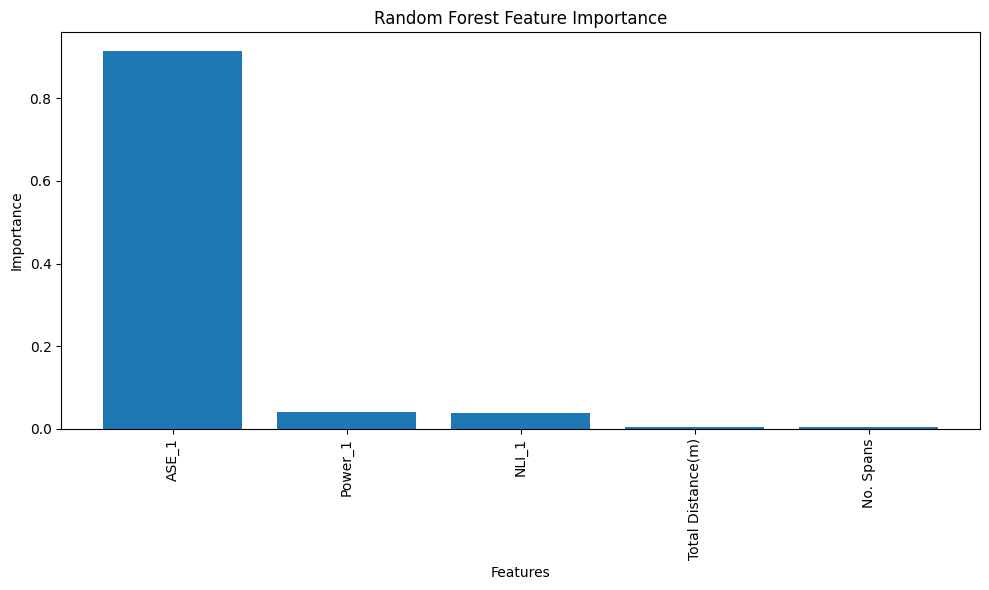

In [10]:
import torch
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

# Assuming features and target are already defined from previous data preprocessing steps
# Example: X = features, y = target

# Convert pandas Series to numpy arrays
y_numpy = target.to_numpy()

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, y_numpy, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature selection
selector = SelectFromModel(estimator=RandomForestRegressor(n_estimators=100, random_state=42))
selector.fit(X_train_scaled, y_train)
X_train_selected = selector.transform(X_train_scaled)
X_test_selected = selector.transform(X_test_scaled)

# Convert numpy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train_selected, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_selected, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Convert PyTorch tensors to numpy arrays for scikit-learn
X_train_np = X_train_tensor.numpy()
X_test_np = X_test_tensor.numpy()
y_train_np = y_train_tensor.numpy()
y_test_np = y_test_tensor.numpy()

# Define base models with hardcoded hyperparameters
models = {
    'Random Forest': RandomForestRegressor(
        n_estimators=300,
        max_depth=20,
        min_samples_split=2,
        random_state=42
    ),
    'Gradient Boosting': GradientBoostingRegressor(
        n_estimators=300,
        learning_rate=0.1,
        max_depth=5,
        random_state=42
    ),
    'XGBoost': XGBRegressor(
        n_estimators=300,
        learning_rate=0.1,
        max_depth=7,
        random_state=42
    )
}

# Evaluate models using cross-validation
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train_np, y_train_np, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-cv_scores)
    print(f"\n{name} Cross-Validation RMSE: {rmse_scores.mean():.4f} (+/- {rmse_scores.std() * 2:.4f})")

# Create a stacking ensemble
base_models = list(models.values())
meta_model = Ridge(alpha=1.0)

stacking_model = StackingRegressor(
    estimators=[(name, model) for name, model in models.items()],
    final_estimator=meta_model,
    cv=5
)

stacking_model.fit(X_train_np, y_train_np)

# Evaluate the stacking model
stacking_pred = stacking_model.predict(X_test_np)
stacking_mse = mean_squared_error(y_test_np, stacking_pred)
stacking_r2 = r2_score(y_test_np, stacking_pred)

print("\nStacking Ensemble Performance:")
print(f"MSE: {stacking_mse:.4f}")
print(f"RMSE: {np.sqrt(stacking_mse):.4f}")
print(f"R2: {stacking_r2:.4f}")

# Compare with individual models
for name, model in models.items():
    model.fit(X_train_np, y_train_np)  # Ensure model is trained
    y_pred = model.predict(X_test_np)
    mse = mean_squared_error(y_test_np, y_pred)
    r2 = r2_score(y_test_np, y_pred)
    print(f"\n{name} Performance:")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {np.sqrt(mse):.4f}")
    print(f"R2: {r2:.4f}")

# Since stacking_model.final_estimator_ (Ridge) may not have feature importance,
# we will display feature importance from one of the base models (e.g., Random Forest)

# Feature importance from Random Forest
importances = models['Random Forest'].feature_importances_
feature_names = features.columns[selector.get_support()]

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

print("\nRandom Forest Feature Importance:")
print(feature_importance_df)

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['feature'], feature_importance_df['importance'])
plt.title('Random Forest Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
